In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from fermipy import utils
import io
import glob

# Procurando entender como funciona a relação entre Eflux e loglikes

Peguntas a responder :
  -  Uma galaxia que tem um upper limit maior que outra significa o que exatamente?
  
  
  Signifiva que, o sinal detectado tem uma relação com a distribuição do x2 "mais lenta". Nesse sentido, um upper limit de eflux maior que outro, implica que o fluxo de energia vindo de um lugar é maior que outro. O que é okay, dado que o background não deve ser homogeneo.
  
  
  -  Ter um eflux maior implplica em uma seção de choque maior?
  
Sim, implica com certeza.



  -  De forma geral, qual a relação entre eflux e seção de Choque??

## a ideia é desenvolver um código que analise se os pontos estão Okay

Bom de forma geral, um meio de verificar a consistencia dos dados é basicamente olhando para a media dos eflux a 95%. Então essa pode ser uma primeira analise.

- Ler os dados de eflux de cada galaxia para 6 e 14 anos.
- Calulcar os valores de eflux a 95% para cada galaxia.
- Calcular a media por bin dos dados de 6 e 14 anos
- plotar o resultado, sendo o esperado uma media mais alta dos dados de 6 anos para os bins menores e uma media maior para os bins maiores.

### Lendo os dados de eflux para cada galaxia:

In [102]:
# uma maneira de fazer isso, é criando uma matriz com 15 linhas e 24 colunas. 
# uma coisa que seria interessante também seria criar um dicionario com esses valores.

Lista_eflux_P8R2 = glob.glob('eflux_and_loglikes_files/P8R2_14Years_files/*_eflux_14years_P8R2.txt')
Lista_loglikes_P8R2 = glob.glob('eflux_and_loglikes_files/P8R2_14Years_files/*_Dloglikes_14years_P8R2.txt')

#--------------------------------------------------------------------#
Lista_eflux_P8R2_6years =  glob.glob('eflux_and_loglikes_files/P8R2_6years_Files/*_eflux_6years_P8R2.txt')
Lista_loglikes_P8R2_6years = glob.glob('eflux_and_loglikes_files/P8R2_6years_Files/*_Dloglikes_6years_P8R2.txt')

### Calulcando os valores de eflux a 95% para cada galaxia.

In [145]:
Matriz_valores  = np.zeros((15,24))

In [201]:
Lista_eflux_P8R2_6years

['eflux_and_loglikes_files/P8R2_6years_Files/Bootes_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Canes_venatici_II_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Carina_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Coma_berenice_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Draco_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Fornax_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Hercules_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/leo_II_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/leo_IV_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Sculptor_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/segue_1_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Sextans_eflux_6years_P8R2.txt',
 'eflux_and_loglikes_files/P8R2_6years_Files/Ursa_Major_II_eflux_

In [202]:
Matriz_valores_6years =  np.zeros((15,24))

In [203]:
for i in range(len(Lista_eflux_P8R2_6years)):
    eflux =np.loadtxt(Lista_eflux_P8R2_6years[i])
    loglikes = np.loadtxt(Lista_loglikes_P8R2_6years[i])
    for j in range(len(eflux)):
        Matriz_valores_6years[i][j]= utils.get_parameter_limits(eflux[j],loglikes[j])['ul']

In [162]:
for i in range(len(Lista_eflux_P8R2)):
    eflux =np.loadtxt(Lista_eflux_P8R2[i])
    loglikes = np.loadtxt(Lista_loglikes_P8R2[i])
    for j in range(len(eflux)):
        Matriz_valores[i][j]= utils.get_parameter_limits(eflux[j],loglikes[j])['ul']

### Calculando a media por bin dos dados de 6 e 14 anos


In [211]:
Media_6years =  Matriz_valores_6years.mean(axis=0) 
Media_14years = Matriz_valores.mean(axis=0)

###  plotar o resultado, sendo o esperado uma media mais alta dos dados de 6 anos para os bins menores e uma media maior para os bins maiores.

In [177]:
data = np.loadtxt('likes_files/like_bootes_I.txt',unpack=True)
emins, emaxs = np.unique(data[0]),np.unique(data[1])
ebin = np.sqrt(emins*emaxs)

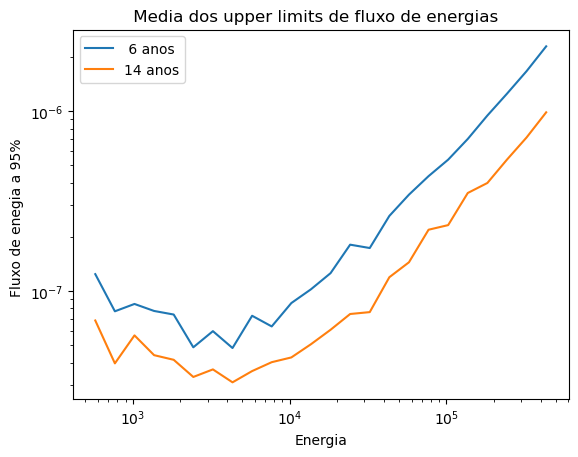

In [217]:
#plt.plot(eflux_P8R2_6year, label =' 6 anos')
plt.plot(ebin,Media_6years, label  = ' 6 anos')
plt.plot(ebin,Media_14years, label = '14 anos')
plt.ylabel('Fluxo de enegia a 95% ')
plt.title(' Media dos upper limits de fluxo de energias   ')
plt.xlabel('Energia')
plt.yscale('log')
plt.xscale('log')
plt.legend()